<a href="https://colab.research.google.com/github/namrathakilari/IIITH-Labs-and-Projects/blob/main/Module%204/STP_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Prorgam on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

# Gradient Descent: A Quick Recap

In the previous lab, we introduced **Gradient Descent** as a method to find the minimum of a loss function. It is the core optimization algorithm that powers a vast majority of **Machine Learning** and **Deep Learning** models.

---

### A Quick Recap of the Algorithm

The core idea of **Gradient Descent** is to iteratively take steps in the direction of the steepest descent of a function (our loss function) to find its minimum.

1. Start with a random initialization of the solution (model parameters or weights).
2. Incrementally change the solution by moving in the direction of the **negative gradient** of the loss function.
3. Repeat the previous step until some convergence criteria is met.

---

The key update equation for a weight or parameter ($w$) is:

$$
w_{k+1} \leftarrow w_k - \eta \nabla J
$$

Where:
- $w_k$ is the current weight.
- $\eta$ is the **learning rate**.
- $\nabla J$ is the **gradient of the loss function** $J$.


In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


### Setting up the Environment and Data

First, let's import the necessary libraries and set a random seed for reproducibility.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(42)

## Creating the Data

We'll generate some synthetic data that follows a **linear pattern**. Our true linear equation will be:

$$
y = 4 + 3x
$$

We will also add some **random noise** to the y values to simulate real-world data, which is rarely perfect.

Let's generate the data with:
- `y0 = 4` (intercept)
- `y1 = 3` (slope)

and add some noise to the data.


In [8]:
# We are creating data based on the equation y = 4 + 3x + noise

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Here, np.random.rand(100, 1) creates 100 random numbers between 0 and 1. Multiplying by 2 scales this to be between 0 and 2. np.random.randn(100, 1) adds Gaussian noise (random fluctuations) to our y values.

Let's also plot the data we just created

Text(0, 0.5, 'y')

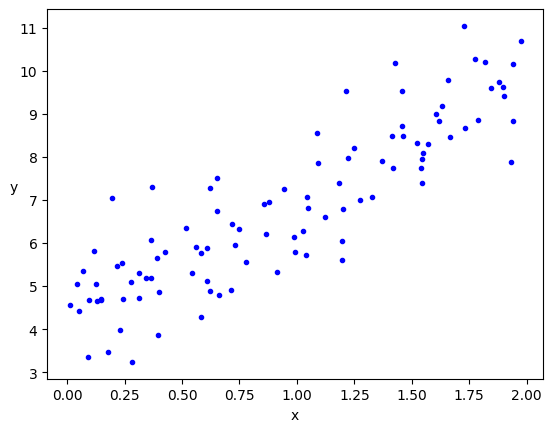

In [9]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

Our goal is to use Gradient Descent to find the original parameters (intercept = 4, slope = 3) just by looking at this scattered data.

## The Cost Function for Linear Regression

Before we can optimize, we need to define how we measure error. For **Linear Regression**, we use the **Mean Squared Error (MSE)** cost function. It measures the average squared difference between the model's predictions and the actual values.

The equation for the MSE cost function $J$ is:

$$
J(\theta) = \frac{1}{2m}  \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

Where:
- $m$ is the number of training examples.
- $\theta$ is our vector of model parameters (in our case, the intercept and the slope).
- $h_\theta(x^{(i)})$ is the prediction for the $i$-th example.
- $y^{(i)}$ is the true label for the $i$-th example.

The $\frac{1}{2}$ is included for convenience, as it simplifies the derivative calculation.


In [10]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## The Gradient of the Cost Function

To use **Gradient Descent**, we need the partial derivatives of the cost function with respect to each parameter \(\theta_j\).

The general form of the gradient for **Linear Regression** is:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

For our problem with one feature \(x\) and an intercept, we have two parameters: \(\theta_0\) (intercept) and \(\theta_1\) (slope). The updates will be:

$$
\theta_0 := \theta_0 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)
$$

$$
\theta_1 := \theta_1 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_1^{(i)}
$$

This can be written in a compact, **vectorized form**:

$$
\nabla J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$


### Variant 1: Batch Gradient Descent

**Batch Gradient Descent** is the simplest variant. In each step, it calculates the gradient using the **entire training dataset**.

**Pros:**
- The convergence path is smooth and stable because the gradient is a true average over all data.

**Cons:**
- It is very slow and computationally expensive for large datasets.


In [11]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of parameters (theta)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        # Calculate prediction: prediction = X . theta
        prediction = np.dot(X, y_pred)

        # Update parameters: theta = theta - (1/m) * learning_rate * (X^T . (prediction - y))
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))

        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

### Running Batch Gradient Descent

Let's run this for **1000 iterations** with a learning rate of **0.01**. We start with a random guess for our parameters (`y_pred`).

**Our model** is:
$$
y = \theta_0 + \theta_1 x
$$

**A crucial step:**
To handle the intercept term $\theta_0$ using matrix multiplication, we add a "dummy" feature $x_0 = 1$ to all our input samples. This is known as the **bias trick**.


In [12]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


The learned parameters (3.903, 3.046) are very close to our original true values (4, 3)!

### Visualizing the Loss

Let's plot the error at each iteration. This is our "descent down the mountain".

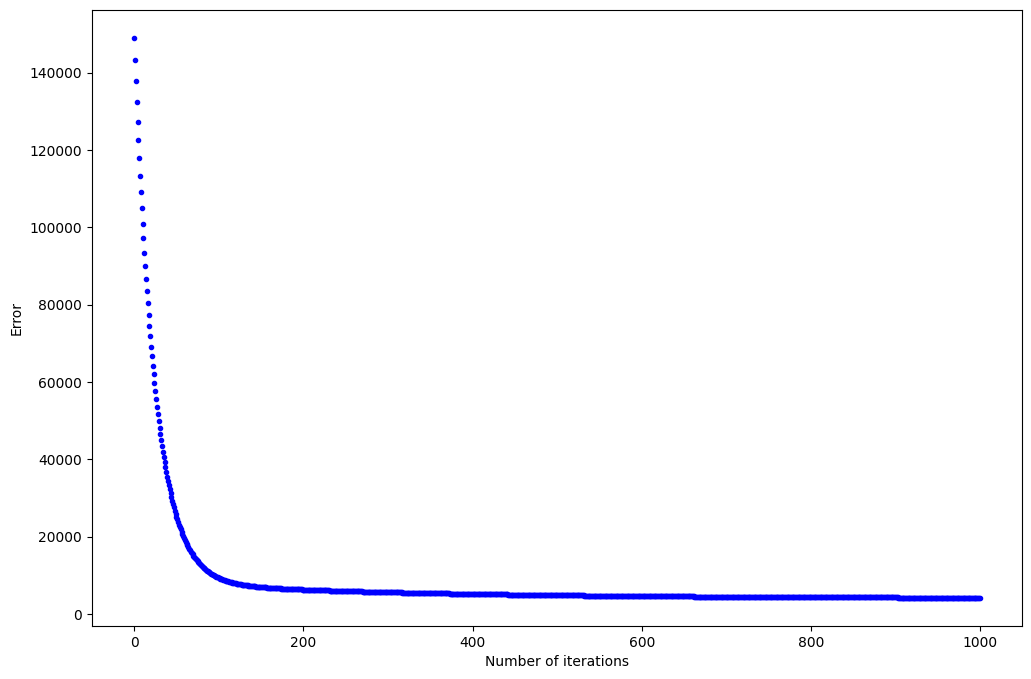

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in on the first 200 iterations shows how the error drops rapidly at first and then slows down as it approaches the minimum.

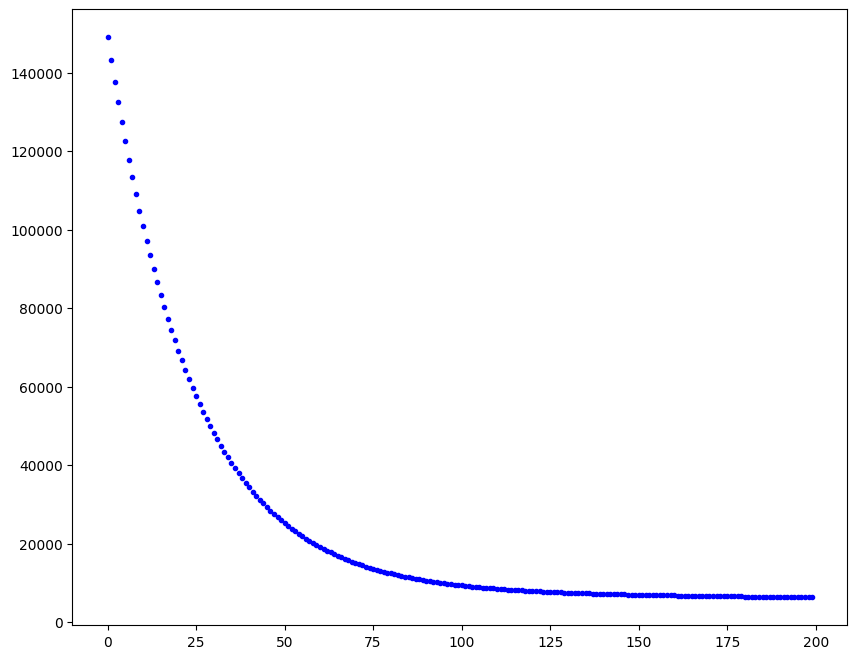

In [14]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

The smooth curve is characteristic of Batch Gradient Descent.

### Variant 2: Stochastic Gradient Descent (SGD)

**Batch GD** is inefficient for large datasets. **SGD** addresses this by taking a gradient step based on **only one randomly chosen training example at a time**.

**Pros:**
- Extremely fast per step.
- Can help escape shallow local minima due to its random nature.

**Cons:**
- The path to the minimum is very noisy and erratic.
- It never truly "settles" at the minimum but bounces around it.


In [15]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

Let's run SGD. Note that it requires a much higher learning rate and fewer epochs (passes over the data) to converge.

In [16]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


Again, the parameters are close to the true values, but notice the final error is higher and the parameters are slightly less accurate. This is due to the noisy nature of SGD.


### Visualizing the Loss

The loss curve for SGD is much more erratic.

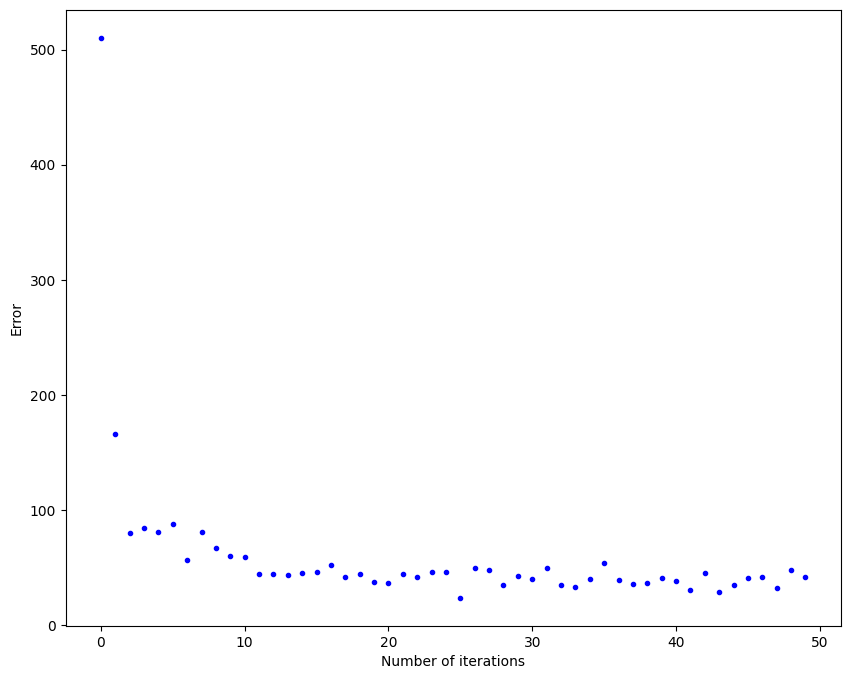

In [17]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

### Variant 3: Mini-Batch Gradient Descent

**Mini-Batch GD** is the happy medium. It computes the gradient on a small, random subset of the data called a **mini-batch**.

**Pros:**
- A good balance between the stability of Batch GD and the speed of SGD.
- Allows for vectorized implementation, making it very efficient on modern hardware (like GPUs).

**Cons:**
- Introduces a new hyperparameter: the `batch_size`.

This is the **most common variant** used in deep learning today.


In [18]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

Let's run it.

In [19]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


### Visualizing the Loss

The loss curve is less noisy than SGD but not as smooth as Batch GD.

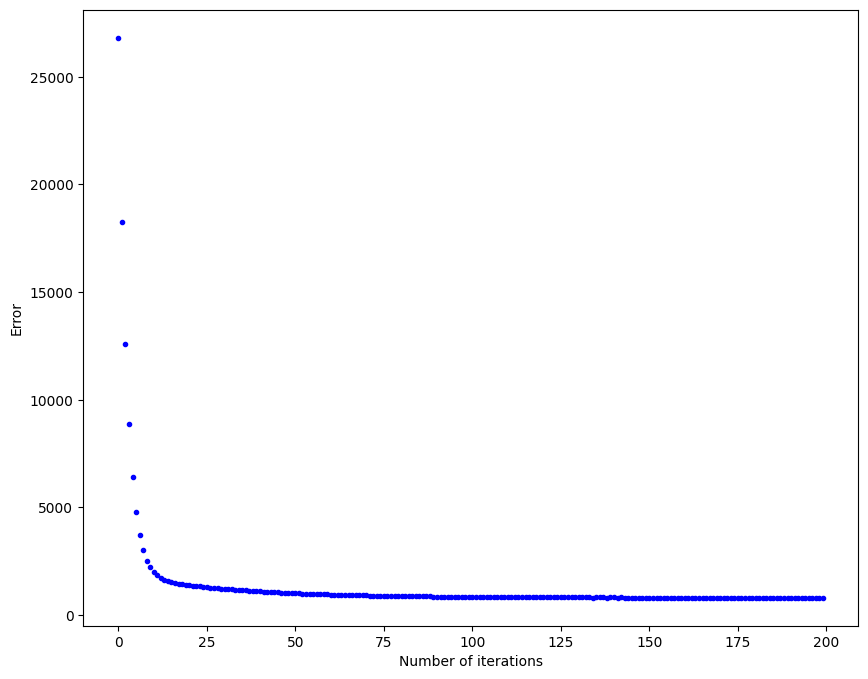

In [20]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

### Visual Comparison of the Learned Models

Let's re-run all three algorithms and plot their final learned lines on the original data. This will give us a better intuition for how they perform.

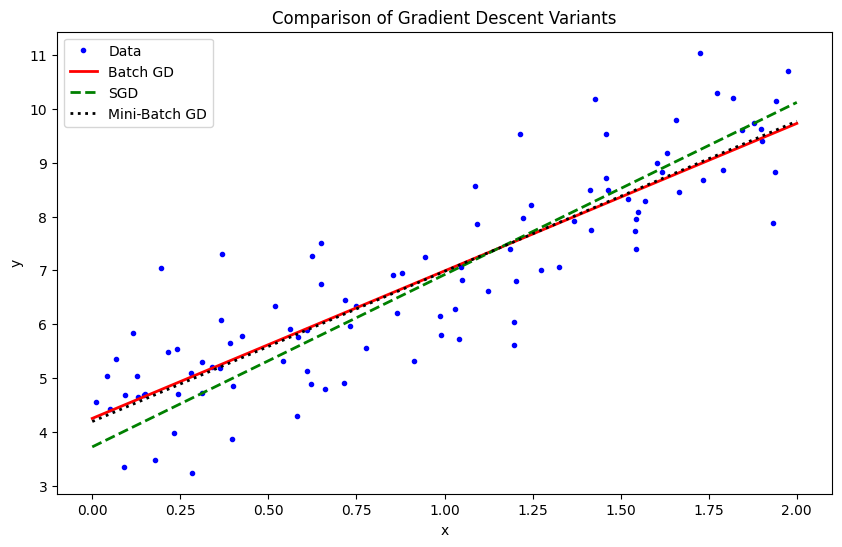

In [21]:
# Rerun all three for comparison
# Batch
lr_batch = 0.1
n_iter_batch = 200
y_pred_batch_final, _, _ = gradient_descent(X_b, y, np.random.randn(2,1), lr_batch, n_iter_batch)

# SGD
lr_sgd = 0.05
n_iter_sgd = 200
y_pred_sgd_final, _ = stocashtic_gradient_descent(X_b, y, np.random.randn(2,1), lr_sgd, n_iter_sgd)

# Mini-Batch
lr_mini = 0.1
n_iter_mini = 200
y_pred_mini_final, _ = minibatch_gradient_descent(X, y, np.random.randn(2,1), lr_mini, n_iter_mini)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.', label='Data')
# Create a set of X values for plotting the lines
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
# Get predictions for the lines
y_predict_batch = X_new_b.dot(y_pred_batch_final)
y_predict_sgd = X_new_b.dot(y_pred_sgd_final)
y_predict_mini = X_new_b.dot(y_pred_mini_final)

plt.plot(X_new, y_predict_batch, 'r-', linewidth=2, label='Batch GD')
plt.plot(X_new, y_predict_sgd, 'g--', linewidth=2, label='SGD')
plt.plot(X_new, y_predict_mini, 'k:', linewidth=2, label='Mini-Batch GD')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Gradient Descent Variants')
plt.legend()
plt.show()

As you can see, all three methods find a very good fit to the data. While their training dynamics (the loss curves) are very different, they all achieve the same goal.

### Things to Try Out

1. **Change batch size in mini-batch gradient descent:**
   Try a small size (e.g., `2`) and a large size (e.g., `80`). How does the loss curve change? What happens when the batch size equals the total number of samples?

2. **Test on real datasets:**
   Use a dataset from `sklearn.datasets`, like the **Boston Housing** or **Diabetes** datasets, and see how each variant performs.

3. **Compare learning rates:**
   Test the effects of changing the learning rate. Try a very high and a very low learning rate for each of the three variants. Which one is most sensitive to the learning rate?

4. **Implement a learning rate schedule for SGD:**
   Instead of a fixed learning rate, make it decrease over time (e.g., `lr = initial_lr / (epoch + 1)`). How does this affect the final error and the stability of the loss curve?


STOCHASTIC GRADIENT DESCENT

First 5 rows of dataset:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

--- Final Results ---
Theta[0]: 0.028
Theta[1]: -0.160
Theta[2]: 0.110
Theta[3]: 0.003
Theta[4]: 0.018
Theta[5]: -0.156
Theta[6]: 0.290
Theta[7]: -0.073
Theta[8]: -0.340
Theta[9]: 0.315
Theta[10]: -0.215
Theta[11]: -0.185
Theta[12]: 0.077
Theta[13]: -0.264
Final error: 0.090


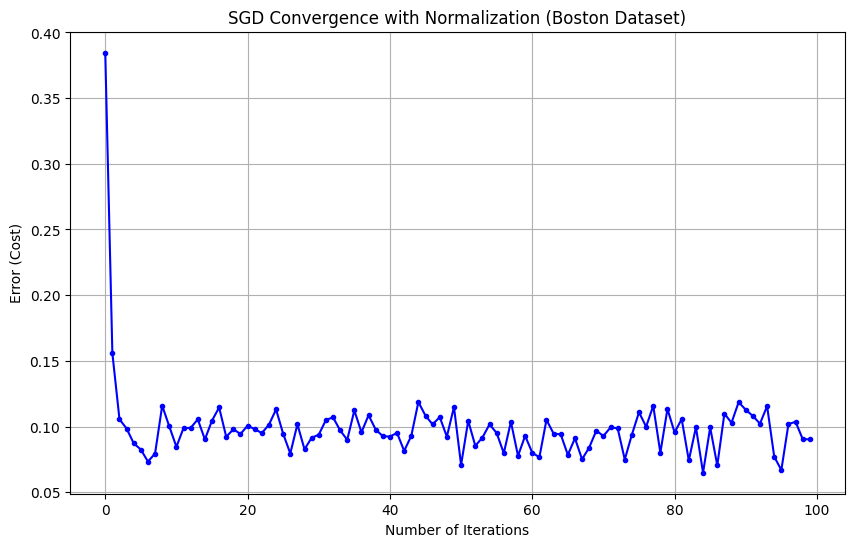

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# -----------------------------
# Load Boston Housing Dataset
# -----------------------------
boston = fetch_openml(name='boston', version=1, as_frame=True)
data = boston.frame

print("First 5 rows of dataset:")
print(data.head())

# -----------------------------
# Prepare X and y
# -----------------------------
X = data.drop(columns='MEDV').values   # Features
y = data['MEDV'].values.reshape(-1, 1) # Target

# -----------------------------
# Feature Scaling
# -----------------------------
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Add bias term
X_b = np.c_[np.ones((len(X), 1)), X]

# -----------------------------
# Cost Function
# -----------------------------
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# -----------------------------
# Stochastic Gradient Descent
# -----------------------------
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, -1)
            y_i = y[rand_ind].reshape(1, 1)

            prediction = X_i.dot(theta)
            theta = theta - learning_rate * (X_i.T.dot(prediction - y_i))

            cost += cal_cost(theta, X_i, y_i)

        cost_history[it] = cost / m

    return theta, cost_history

# -----------------------------
# Training
# -----------------------------
np.random.seed(42)
theta_init = np.random.randn(X_b.shape[1], 1)
lr = 0.01
n_iter = 100

theta_final, cost_history = stochastic_gradient_descent(
    X_b, y, theta_init, lr, n_iter
)

# -----------------------------
# Results
# -----------------------------
print("\n--- Final Results ---")
for i in range(len(theta_final)):
    print(f"Theta[{i}]: {theta_final[i][0]:.3f}")

print('Final error: {:0.3f}'.format(cost_history[-1]))

# -----------------------------
# Plot Convergence
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(n_iter), cost_history, 'b.-')
plt.xlabel('Number of Iterations')
plt.ylabel('Error (Cost)')
plt.title("SGD Convergence with Normalization (Boston Dataset)")
plt.grid(True)
plt.show()


MINI BATCH GRADIENT DESCENT

First 5 rows of dataset:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

--- Final Results ---
Theta[0]: 22.357
Theta[1]: -1.104
Theta[2]: 1.086
Theta[3]: 0.030
Theta[4]: 0.434
Theta[5]: -2.202
Theta[6]: 2.643
Theta[7]: -0.064
Theta[8]: -3.016
Theta[9]: 2.541
Theta[10]: -2.170
Theta[11]: -2.028
Theta[12]: 0.779
Theta[13]: -3.665
Final error: 10.849


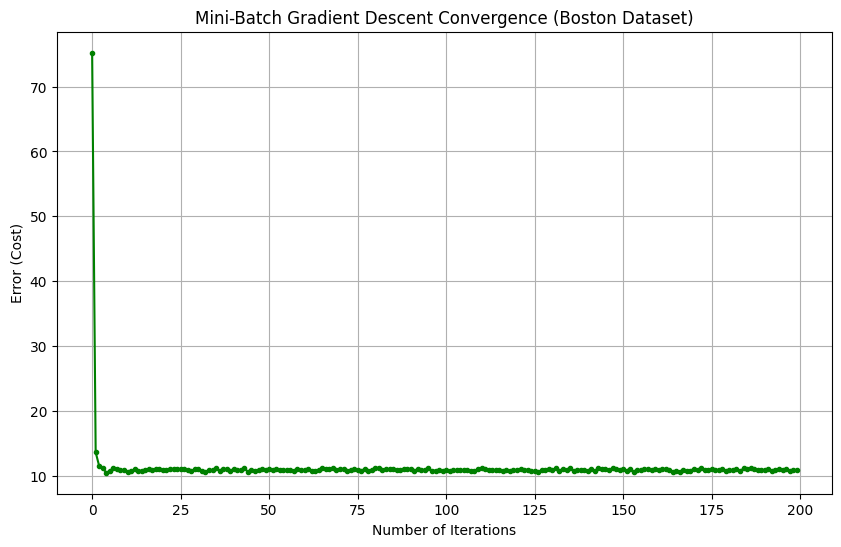

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# -----------------------------
# Load Boston Housing Dataset
# -----------------------------
boston = fetch_openml(name='boston', version=1, as_frame=True)
data = boston.frame

print("First 5 rows of dataset:")
print(data.head())

# -----------------------------
# Prepare X and y
# -----------------------------
X = data.drop(columns='MEDV').values
y = data['MEDV'].values.reshape(-1, 1)

# -----------------------------
# Feature Scaling (X only, as in your code)
# -----------------------------
scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------
# Cost Function
# -----------------------------
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# -----------------------------
# Mini-Batch Gradient Descent
# -----------------------------
def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=100, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        # Shuffle data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i + batch_size]
            y_i = y_shuffled[i:i + batch_size]

            # Add bias term
            X_i = np.c_[np.ones(len(X_i)), X_i]

            prediction = X_i.dot(theta)
            theta = theta - (learning_rate / len(y_i)) * (X_i.T.dot(prediction - y_i))

            cost += cal_cost(theta, X_i, y_i)

        cost_history[it] = cost / (m // batch_size)

    return theta, cost_history

# -----------------------------
# Training
# -----------------------------
np.random.seed(42)
theta_init = np.random.randn(X.shape[1] + 1, 1)
lr = 0.1
n_iter = 200
batch_size = 32

theta_final, cost_history = minibatch_gradient_descent(
    X, y, theta_init, lr, n_iter, batch_size
)

# -----------------------------
# Results
# -----------------------------
print("\n--- Final Results ---")
for i in range(len(theta_final)):
    print(f"Theta[{i}]: {theta_final[i][0]:.3f}")

print('Final error: {:0.3f}'.format(cost_history[-1]))

# -----------------------------
# Plot Convergence
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(n_iter), cost_history, 'g.-')
plt.xlabel('Number of Iterations')
plt.ylabel('Error (Cost)')
plt.title("Mini-Batch Gradient Descent Convergence (Boston Dataset)")
plt.grid(True)
plt.show()


BATCH GRADIENT DESCENT

Theta[0] (bias): 0.217
Theta[1] (weight): 3.618
Final error: 29.298


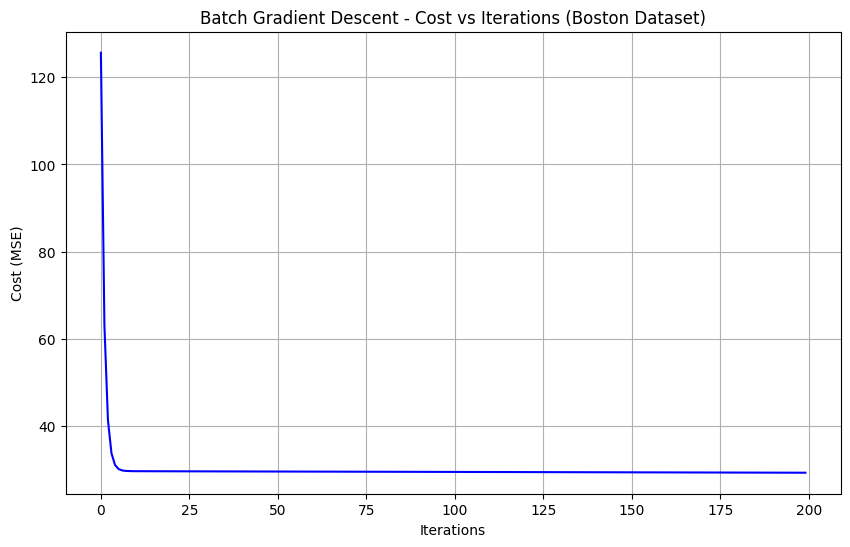

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

# -----------------------------
# Load Boston Housing Dataset
# -----------------------------
boston = fetch_openml(name='boston', version=1, as_frame=True)
data = boston.frame

# Use one feature (RM) and target (MEDV)
X = data['RM'].values.reshape(-1, 1)
y = data['MEDV'].values.reshape(-1, 1)

# -----------------------------
# Cost Function
# -----------------------------
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# -----------------------------
# Batch Gradient Descent
# -----------------------------
def batch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, X.shape[1]))

    for it in range(iterations):
        prediction = X.dot(theta)
        gradient = (1 / m) * X.T.dot(prediction - y)
        theta = theta - learning_rate * gradient

        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, X, y)

    return theta, cost_history, theta_history

# -----------------------------
# Add Bias Term
# -----------------------------
X_b = np.c_[np.ones((len(X), 1)), X]

# Initialize theta
np.random.seed(42)
theta_init = np.random.randn(X_b.shape[1], 1)

# -----------------------------
# Training
# -----------------------------
lr = 0.01
n_iter = 200

theta_final, cost_history, theta_history = batch_gradient_descent(
    X_b, y, theta_init, lr, n_iter
)

# -----------------------------
# Results
# -----------------------------
print('Theta[0] (bias): {:0.3f}'.format(theta_final[0][0]))
print('Theta[1] (weight): {:0.3f}'.format(theta_final[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

# -----------------------------
# Plot Cost vs Iterations
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(n_iter), cost_history, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Batch Gradient Descent - Cost vs Iterations (Boston Dataset)')
plt.grid(True)
plt.show()


CHANGING BATCH SIZE IN MINI BATCH GRADIENT DESCENT

First 5 rows of dataset:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

--- Final Results ---
Theta[0]: 22.226
Theta[1]: -1.280
Theta[2]: 1.184
Theta[3]: -0.049
Theta[4]: 0.061
Theta[5]: -2.329
Theta[6]: 2.709
Theta[7]: -0.125
Theta[8]: -2.906
Theta[9]: 2.481
Theta[10]: -2.212
Theta[11]: -2.010
Theta[12]: 0.767
Theta[13]: -3.616
Final error: 9.853


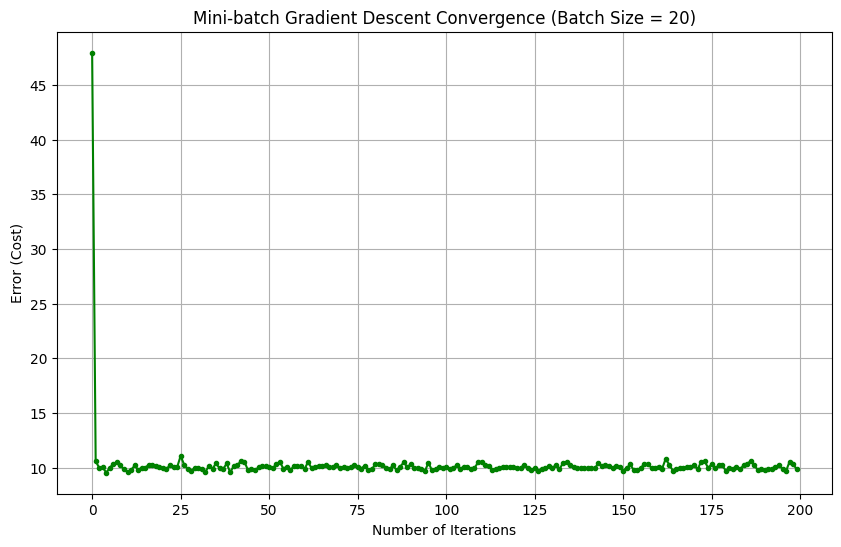

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# -----------------------------
# Load Boston Housing Dataset
# -----------------------------
boston = fetch_openml(name='boston', version=1, as_frame=True)
data = boston.frame

print("First 5 rows of dataset:")
print(data.head())

# -----------------------------
# Prepare X and y
# -----------------------------
X = data.drop(columns='MEDV').values
y = data['MEDV'].values.reshape(-1, 1)

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------
# Cost Function
# -----------------------------
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# -----------------------------
# Mini-Batch Gradient Descent
# -----------------------------
def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=100, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        # Shuffle data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i + batch_size]
            y_i = y_shuffled[i:i + batch_size]

            # Add bias term
            X_i = np.c_[np.ones(len(X_i)), X_i]

            prediction = X_i.dot(theta)
            theta = theta - (learning_rate / len(y_i)) * (X_i.T.dot(prediction - y_i))

            cost += cal_cost(theta, X_i, y_i)

        cost_history[it] = cost / (m // batch_size)

    return theta, cost_history

# -----------------------------
# Training
# -----------------------------
np.random.seed(42)
theta_init = np.random.randn(X.shape[1] + 1, 1)
lr = 0.1
n_iter = 200
batch_size = 20

theta_final, cost_history = minibatch_gradient_descent(
    X, y, theta_init, lr, n_iter, batch_size
)

# -----------------------------
# Results
# -----------------------------
print("\n--- Final Results ---")
for i in range(len(theta_final)):
    print(f"Theta[{i}]: {theta_final[i][0]:.3f}")

print('Final error: {:0.3f}'.format(cost_history[-1]))

# -----------------------------
# Plot Convergence
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(n_iter), cost_history, 'g.-')
plt.xlabel('Number of Iterations')
plt.ylabel('Error (Cost)')
plt.title("Mini-batch Gradient Descent Convergence (Batch Size = 20)")
plt.grid(True)
plt.show()


## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

### Answer



The correct statement is (iii).

**Explanation:**

* A convex loss function has a single minimum, which is the global minimum (like a perfect bowl).

* Batch Gradient Descent calculates the true gradient of the entire dataset. With a suitable learning rate, it will take determined, non-random steps directly towards the minimum. It is therefore guaranteed to converge to the global optimum of a convex function.

* Stochastic Gradient Descent uses a single random point to estimate the gradient. This estimate is noisy and does not point directly at the minimum. Because of this randomness, SGD will not converge to the exact minimum point but will instead perpetually bounce around in the vicinity of the minimum. To make it converge, one typically has to use a learning rate schedule that slowly decreases the learning rate to zero.

* Statements (i) and (ii) are too strong; they don't specify the type of loss function. For a non-convex function (with many local minima), neither is guaranteed to find the global optimum. They might get stuck in a local minimum.

* **Therefore**, for a convex problem, Batch GD is guaranteed to find the optimum, while standard SGD is not guaranteed to land precisely on it.